---
# Benchmarking - 2D CAYLEY TREE
---

In [1]:
from benchmark_main import *

2021-12-31 12:06:48.512902: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-31 12:06:48.513197: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# FILE INPUT 
+ precalculated network distances 

In [8]:
organism = 'tree' 
net_sizes = [121,512,1093,5461,9841,19531]

In [3]:
b_file100 = open('netdist_precalc/dist_network_121_tree.pkl', "rb")
dist_network100 = pickle.load(b_file100)
print('100 done')

100 done


In [5]:
b_file500 = open('netdist_precalc/dist_network_511_tree.pkl', "rb")
dist_network500 = pickle.load(b_file500)
print('500 done')

b_file1k = open('netdist_precalc/dist_network_1093_tree.pkl', "rb")
dist_network1k = pickle.load(b_file1k)
print('1000 done')

500 done
1000 done


In [4]:
b_file5k = open('netdist_precalc/dist_network_5461_tree.pkl', "rb")
dist_network5k = pickle.load(b_file5k)
print('5000 done')

5000 done


In [6]:
b_file10k = open('netdist_precalc/dist_network_9841_tree.pkl', "rb")
dist_network10k = pickle.load(b_file10k)
print('10k done')

10k done


In [2]:
b_file20k = open('netdist_precalc/dist_network_19531_tree.pkl', "rb")
dist_network20k = pickle.load(b_file20k)
print('20k done')

20k done


# GLOBAL LAYOUT

In [38]:
# CAYLEY TREE 
organism = 'tree'

feature = 'RWRvis'
r = .9
alpha = 1.0

# parameter settings (post-testing)
n_neighbors = 6 #6
spread = 1.0 #1.0
min_dist = 0.9
metric = 'cosine'
lnr = 1
nep = None

In [39]:
#########
# 1 0 0 
#########

branch=3
i=121
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network100.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network100, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:03
7260
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9799772042805386


In [ ]:
#########
# 5 0 0 
#########

branch=2
i=511
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network500.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network500, dist_global)
print('RWR corr coef: ',r_global)

In [ ]:
#########
# 1 0 0 0 
#########

branch=3
i=1093
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network1k, dist_global)
print('RWR corr coef: ',r_global)

In [ ]:
#########
# 5 0 0 0 
#########

branch=4
i=5461
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network5k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network5k, dist_global)
print('RWR corr coef: ',r_global)

In [ ]:
#########
# 1 0 0 0 0
#########

branch=3
i=9841
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network10k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network10k, dist_global)
print('RWR corr coef: ',r_global)

In [5]:
#########
# 2 0 0 0 0
#########

branch=5
i=19531
G = nx.full_rary_tree(branch,i)

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network20k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network20k, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:09:51


In [2]:
# pearson correlation coefficient 

d_netsize_corr_global = {121:0.980,
                            511:0.992, 
                            1093:0.984,
                            5461:0.980, 
                            9841:0.977,
                            19531:0.952
                        }

# time in seconds 

d_netsize_time = {121:3, 
                    511:5, 
                    1093:6, 
                    5461:43,
                    9841:76, #1min 16s 
                    19531:269, #4min 29s
                    }

# NODE2VEC 

In [7]:
# CAYLEY TREE 
organism = 'tree'

feature = 'RWRvis'
r = .9
alpha = 1.0

# parameter settings (post-testing)
n_neighbors = 6 #6
spread = 1.0 #1.0
min_dist = 0.9
metric = 'cosine'
lnr = 1
nep = None

In [7]:
#########
# 1 0 0 
#########

branch=3
i=121
G = nx.full_rary_tree(branch,i)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G,2,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network100.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec)

r_global = pearson_corrcoef(dist_network100, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:00:15
7260
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9841153874569191


In [8]:
#########
# 5 0 0 
#########

branch=2
i=511
G = nx.full_rary_tree(branch,i)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G,2,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network500.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec)

r_global = pearson_corrcoef(dist_network500, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:00:41
130305
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9943619078844679


In [9]:
#########
# 1 0 0 0 
#########

branch=3
i=1093
G = nx.full_rary_tree(branch,i)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G,2,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network1k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec)

r_global = pearson_corrcoef(dist_network1k, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec
Execution Time: 00:01:38
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9900977850608476


In [ ]:
#########
# 5 0 0 0 
#########

branch=4
i=5461
G = nx.full_rary_tree(branch,i)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G,2,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network5k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec)

r_global = pearson_corrcoef(dist_network5k, dist_nodevec)
print('RWR corr coef: ',r_global)

Node2Vec


In [ ]:
#########
# 1 0 0 0 0 
#########

branch=3
i=9841
G = nx.full_rary_tree(branch,i)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G,2,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network10k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec)

r_global = pearson_corrcoef(dist_network10k, dist_nodevec)
print('RWR corr coef: ',r_global)

In [5]:
#########
# 2 0 0 0 0 
#########

branch=5
i=19531
G = nx.full_rary_tree(branch,i)

print('Node2Vec')
start = time.time()
posG_nodevec = layout_nodevec_umap(G,2,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

Node2Vec
Execution Time: 00:09:03


----

In [43]:
pairs=list(dist_network20k.keys())
len(pairs)

190720215

In [79]:
pairs_partone = pairs[:40000000]
len(pairs_partone)

40000000

In [81]:
dist_nodevec_one = pairwise_layout_distance_linalg_parts(pairs_partone,posG_nodevec)

40000000
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done


In [84]:
with open('tree_distnodevec_one.pickle', 'wb') as handle:
    pickle.dump(dist_nodevec_one, handle)

In [86]:
del dist_nodevec_one

In [87]:
pairs_parttwo = pairs[40000000:80000000]
len(pairs_parttwo)

40000000

In [88]:
dist_nodevec_two = pairwise_layout_distance_linalg_parts(pairs_parttwo,posG_nodevec)

40000000
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done


In [90]:
with open('tree_distnodevec_two.pickle', 'wb') as handle:
    pickle.dump(dist_nodevec_two, handle)

In [91]:
del dist_nodevec_two

In [92]:
pairs_partthree = pairs[80000000:120000000]
len(pairs_partthree)

40000000

In [93]:
dist_nodevec_three = pairwise_layout_distance_linalg_parts(pairs_partthree,posG_nodevec)

40000000
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done


In [94]:
with open('tree_distnodevec_three.pickle', 'wb') as handle:
    pickle.dump(dist_nodevec_three, handle)

In [95]:
del dist_nodevec_three

In [96]:
pairs_partfour = pairs[120000000:160000000]
len(pairs_partfour)

40000000

In [97]:
dist_nodevec_four = pairwise_layout_distance_linalg_parts(pairs_partfour,posG_nodevec)

40000000
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done


In [98]:
with open('tree_distnodevec_four.pickle', 'wb') as handle:
    pickle.dump(dist_nodevec_four, handle)

In [99]:
del dist_nodevec_four

In [100]:
pairs_partfive = pairs[160000000:]
len(pairs_partfive)

30720215

In [101]:
dist_nodevec_five = pairwise_layout_distance_linalg_parts(pairs_partfive,posG_nodevec)

30720215
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
complete


In [102]:
with open('tree_distnodevec_five.pickle', 'wb') as handle:
    pickle.dump(dist_nodevec_five, handle)

In [103]:
del dist_nodevec_five

In [4]:
with open('tree_distnodevec_one.pickle', 'rb') as handle:
    one = pickle.load(handle)

In [5]:
with open('tree_distnodevec_two.pickle', 'rb') as handle:
    two = pickle.load(handle)

In [6]:
with open('tree_distnodevec_three.pickle', 'rb') as handle:
    three = pickle.load(handle)

In [7]:
with open('tree_distnodevec_four.pickle', 'rb') as handle:
    four = pickle.load(handle)

In [8]:
with open('tree_distnodevec_five.pickle', 'rb') as handle:
    five = pickle.load(handle)

In [9]:
dist_nodevec = {**one,**two,**three,**four,**five}

---

In [10]:
r_global = pearson_corrcoef(dist_network20k, dist_nodevec)
print('RWR corr coef: ',r_global)

done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.8492882325169925


In [3]:
# pearson correlation coefficient 

d_netsize_corr_nodevec = {121: 0.984,  # old values: 0.985,
                            511: 0.994,  # 0.990, 
                            1093: 0.991,   # 0.991,
                            5461: 0.960,
                            9841: 0.948,
                            19531: 0.849,
                        }

# time in seconds 

d_netsize_time_nodevec = {121: 15, #26, 
                        511: 41,  # 35,
                            1093: 98, #1min 38s  # 63, #1min 3s
                            5461: 203, #3min 23s #333, #5min 33s
                            9841: 296, #4min 56s
                            19531: 4863, #9min 3s
                    }

# FORCE-DIRECTED | NETWORKX

In [9]:
#########
# 1 0 0 
#########

branch=3
i=121
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=900)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network100.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network100, dist_spring)
print('SPRING corr coef: ',r_spring)

SPRING
Execution Time: 00:00:00
7260
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9706883797335722


In [ ]:
#########
# 5 0 0 
#########

branch=2
i=511
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=150)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network500.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network500, dist_spring)
print('SPRING corr coef: ',r_spring)

In [40]:
#########
# 1 0 0 0 
#########

branch=3
i=1093
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=50)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network1k, dist_spring)
print('SPRING corr coef: ',r_spring)

RWR
Execution Time: 00:00:04
SPRING
Execution Time: 00:00:05


RWR corr coef:  0.9715794505342944
SPRING corr coef:  0.9251005465535221


In [30]:
branch=3
i=1093
G = nx.full_rary_tree(branch,i)

print('Runtime spring for Corr. Coeff. 0.97')

start = time.time()
posG_spring = springlayout_2D(G,itr=110)
end = time.time()
m,s = exec_time(start,end)

dist_spring = pairwise_layout_distance_2D(G,posG_spring)
dist_network = pairwise_network_distance(G)

r_spring = pearson_corrcoef(dist_network1k, dist_spring)
print('SPRING corr coef: ',r_spring)

Runtime spring for Corr. Coeff. 0.97
Execution Time: 00:00:16
prep layout distance
prep network distance
prep corr. coeff. data
calculate corr. coeff.
SPRING corr coef:  0.9762090209941461


In [ ]:
#########
# 5 0 0 0 
#########

branch=4
i=5461
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=10)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network5k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('SPRING corr coef: ',r_spring)

In [3]:
print('Runtime spring for Corr. Coeff. 0.97')

branch=4
i=5461
G = nx.full_rary_tree(branch,i)

start = time.time()
posG_spring = springlayout_2D(G,itr=1000)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network5k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('SPRING corr coef: ',r_spring)

Runtime spring for Corr. Coeff. 0.97
Execution Time: 00:34:02
SPRING corr coef:  0.9203227402838982


In [ ]:
#########
# 1 0 0 0 0 
#########

branch=3
i=9841
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=50)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network10k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('SPRING corr coef: ',r_spring)

In [3]:
print('Runtime spring for Corr. Coeff. 0.98')

branch=3
i=9841
G = nx.full_rary_tree(branch,i)

start = time.time()
posG_spring10k = springlayout_2D(G,itr=5000)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network10k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

print('calculate corr. coeff.')
r_spring10k = pearson_corrcoef(dist_network10k, dist_spring10k)
print('SPRING corr coef: ',r_spring10k)

Runtime spring for Corr. Coeff. 0.98
Execution Time: 08:10:34
calculate corr. coeff.
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.901154336176053


In [ ]:
#########
# 2 0 0 0 0 
#########

branch=5
i=19531
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
posG_spring = springlayout_2D(G,itr=15)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network20k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network20k, dist_spring)
print('SPRING corr coef: ',r_spring)

In [5]:
print('Runtime spring for Corr. Coeff. 0.95')

branch=5
i=19531
G = nx.full_rary_tree(branch,i)

start = time.time()
posG_spring20k = springlayout_2D(G,itr=1000)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network20k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

print('calculate corr. coeff.')
r_spring = pearson_corrcoef(dist_network20k, dist_spring20k)
print('SPRING corr coef: ',r_spring)

Runtime spring for Corr. Coeff. 0.95
Execution Time: 05:44:10
calculate corr. coeff.
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.8910250401932167


In [4]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_nx = {
                            121:0.970, 
                            511:0.956, 
                            1093:0.925, 
                            5461:0.884,         
                            9841:0.868,
                            19531:0.809,
                           }

# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_nx = {
                            121:7,
                            511:14,
                            1093:16,
                            5461:12120, #3h 22min
                            9841:43200, #12h 50min > corr coeff. 0.9052620311187282 > itr = 9000 
                            19531:43200 #12h cut off
                           }

# FORCE-DIRECTED | FORCEATLAS2

In [6]:
from fa2 import ForceAtlas2

In [15]:
print('Run for', d_netsize_time[121],'seconds')
      
#########
# 1 0 0 
#########

branch=3
i=121
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(
                        #outboundAttractionDistribution=False,#True,  # Dissuade hubs
                        #jitterTolerance=1.0,  # Tolerance
                        #barnesHutOptimize=False, #True,
                        #barnesHutTheta=1.2,
                        #strongGravityMode=False,
                        #gravity=1.0,
                        verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=10000)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network100.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network100, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 3 seconds
SPRING - forceAtlas2
Execution Time: 00:00:02


calulate distances
7260
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9799683942306886


In [19]:
print('Run for', d_netsize_time[511],'seconds')

#########
# 5 0 0 
#########

branch=2
i=511
G = nx.full_rary_tree(branch,i)
                
print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=3200)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network500.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network500, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 5 seconds
SPRING - forceAtlas2
Execution Time: 00:00:05


calulate distances
130305
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9805989107707016


In [41]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[511])

branch=2
i=511
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False, barnesHutOptimize=True)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=600000)  

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network500.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network500, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for pearson corr.: 0.992
SPRING - forceAtlas2
Execution Time: 00:16:27


calulate distances
130305
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9806858547191432


In [33]:
print('Run for', d_netsize_time[1093],'seconds')

#########
# 1 0 0 0 
#########

branch=3
i=1093
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=600)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network1k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network1k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 6 seconds
SPRING - forceAtlas2
Execution Time: 00:00:05


calulate distances
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9723835861585612


In [ ]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[1093])

branch=3
i=1093
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False, barnesHutOptimize=True,
                         scalingRatio=2.0, #2.0
                         strongGravityMode=False, #False
                         gravity=5.0 #1.0 
                         )
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=150000)  

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network1k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network1k, dist_spring)
print('SPRING corr coef: ',r_spring)

# iter 12000 > 0.973 > 1min 9s
# iter 24000 > 0.975 > 2min 6s
# iter 80000 > 0.975 > 6min 
# iter 15k > 0.98 > 20min 48s

In [30]:
print('Run for', d_netsize_time[5461],'seconds')

#########
# 5 0 0 0 
#########

branch=4
i=5461
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=450)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network5k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 43 seconds
SPRING - forceAtlas2
Execution Time: 00:00:44


calulate distances
14908530
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.957568549362974


In [ ]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[5461])

branch=4
i=5461
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False ,  barnesHutOptimize=True,
                          scalingRatio=2.0, #2.0
                         strongGravityMode=False, #False
                         gravity=5.0 #1.0 
                         )
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=100000)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network5k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('SPRING corr coef: ',r_spring)

# iter 500 > 0.952 > 24 s 
# iter 1000 > 0.920 > 47s
# iter 25k > 0.922 > 38min 4s
# iter 100k >   > 

In [ ]:
print('Run for', d_netsize_time[9841],'seconds')

#########
# 1 0 0 0 0
#########
branch=3
i=9841
G = nx.full_rary_tree(branch,i)

print('SPRING')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=200)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network10k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('SPRING corr coef: ',r_spring)

In [ ]:
############################

# CORRELATION FACTOR MATCH 

#####################z#######

print('Run for pearson corr.:', d_netsize_corr_global[9841])

branch=3
i=9841
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False, barnesHutOptimize=True)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=20000)

posG_spring_norm = minmaxscaling_posG(G,posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network10k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('SPRING corr coef: ',r_spring)

# iter 5000 > 0.902 > 15min 54s  

In [101]:
print('Run for', d_netsize_time[19531],'seconds')

#########
# 2 0 0 0 0
#########

branch=5
i=19531
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=950)

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

Run for 269 seconds
SPRING - forceAtlas2
Execution Time: 00:04:24


In [ ]:
pairs = list(dist_network20k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

print('calculate pearson corr.coef.')
r_spring = pearson_corrcoef(dist_network20k, dist_spring)
print('SPRING corr coef: ',r_spring)

190720215
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done


In [ ]:
############################

# CORRELATION FACTOR MATCH 

############################

print('Run for pearson corr.:', d_netsize_corr_global[19531])

branch=5
i=19531
G = nx.full_rary_tree(branch,i)

print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False)
posG_spring = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=10000)

posG_spring_norm = minmaxscaling_posG(posG_spring)

end = time.time()
m,s = exec_time(start,end)

print('\n')

pairs = list(dist_network20k.keys())
print('calulate distances')
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring_norm)

r_spring = pearson_corrcoef(dist_network20k, dist_spring)
print('SPRING corr coef: ',r_spring)

In [5]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_fa = {
                            121:0.980, 
                            511:0.978, 
                            1093:0.972,
                            5461:0.958,
                            9841:0.936,
                            19531:0.864
                           }

# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_fa = {
                        121: 3, 
                        511: 5,
                        1093: 1248, #20min 48s
                        5461: 10223, #2h 50min 23s
                        9841: 22992, #6h 23min 12s,
                        19531: 43200 # cutoff
                           }

# FORCE-DIRECTED | iGRAPH
+ https://igraph.org/python/doc/tutorial/visualisation.html
+ https://towardsdatascience.com/newbies-guide-to-python-igraph-4e51689c35b4
+ https://igraph.org/c/doc/igraph-Layout.html#igraph_layout_fruchterman_reingold_3d
+ using the fruchterman-reingold layout

In [10]:
import igraph as ig

In [40]:
print('Run for', d_netsize_time[121],'seconds')

#########
# 1 0 0 
#########

branch=3
i=121
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter= 80000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network100.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network100, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 3 seconds
SPRING - igraph
Execution Time: 00:00:03
7260
1k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9704270606828345


In [39]:
print('Run for', d_netsize_time[511],'seconds')

#########
# 5 0 0 
#########

branch=2
i=511
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter= 10000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network500.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network500, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 5 seconds
SPRING - igraph
Execution Time: 00:00:05
130305
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9684996499035615


In [45]:
print('Run for', d_netsize_time[1093],'seconds')

#########
# 1 0 0 0 
#########

branch=3
i=1093
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter=32000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network1k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 6 seconds
SPRING - igraph
Execution Time: 00:00:06
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9880712680876592


In [ ]:
print('Run for', d_netsize_time[5461],'seconds')

#########
# 5 0 0 0 
#########

branch=4
i=5461
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter=40000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network5k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network5k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 43 seconds


In [18]:
print('Run for', d_netsize_time[9841],'seconds')

#########
# 1 0 0 0 0
#########
branch=3
i=9841
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter= 30000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network10k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 76 seconds
SPRING - igraph
Execution Time: 00:01:07
48417720
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9517679504147355


In [9]:
############################

# CORRELATION FACTOR MATCH 

#####################z#######

print('Run for pearson corr.:', d_netsize_corr_global[9841])

branch=3
i=9841
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter=500000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network10k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network10k, dist_spring)
print('SPRING corr coef: ',r_spring)

# iter 200k > 0.963 > 6min 33s
# iter 500k > 0.976 > 16min 11s

Run for pearson corr.: 0.977
SPRING - igraph
Execution Time: 00:16:11
48417720
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9755167694661866


In [ ]:
print('Run for', d_netsize_time[19531],'seconds')

#########
# 2 0 0 0 0
#########

branch=5
i=19531
nxG = nx.full_rary_tree(branch,i)
iG = ig.Graph.from_networkx(nxG)

print('SPRING - igraph')
start = time.time()
print('distance calculation')
posG  = iG.layout_fruchterman_reingold(niter=50000)
posG_spring = dict(zip(nxG.nodes(),posG))
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network20k.keys())
dist_spring = pairwise_layout_distance_linalg(pairs,posG_spring)

r_spring = pearson_corrcoef(dist_network20k, dist_spring)
print('SPRING corr coef: ',r_spring)

Run for 269 seconds
SPRING - igraph
distance calculation
Execution Time: 00:03:24
190720215
1k done
10k done
50k done
100k done
500k done
1mio done
5mio done
10mio done
15mio done
20mio done
25mio done
30mio done
40mio done


In [6]:
# pearson correlation coefficient at run time of: d_netsize_time

d_netsize_corr_ig = {
                            121:0.970, 
                            511:0.968, 
                            1093:0.987,
                            5461:0.962,
                            9841:0.950,
                            19531:0.879 
                           }

# run time at pearson corr. coef. of: d_netsize_corr_global

d_netsize_time_ig = {
                        121: 3, 
                        511: 5, 
                        1093: 6, 
                        5461: 65, #1min 5s
                        9841: 971, #16min 11s
                        19531: 10200 # 2h 50min
                           }

# DIAGRAMS 
+ comparing runtime and pearson corr. coeff. of global layout to three force-directed layout methods 

In [53]:
labelsize = 22
tick_size = 12

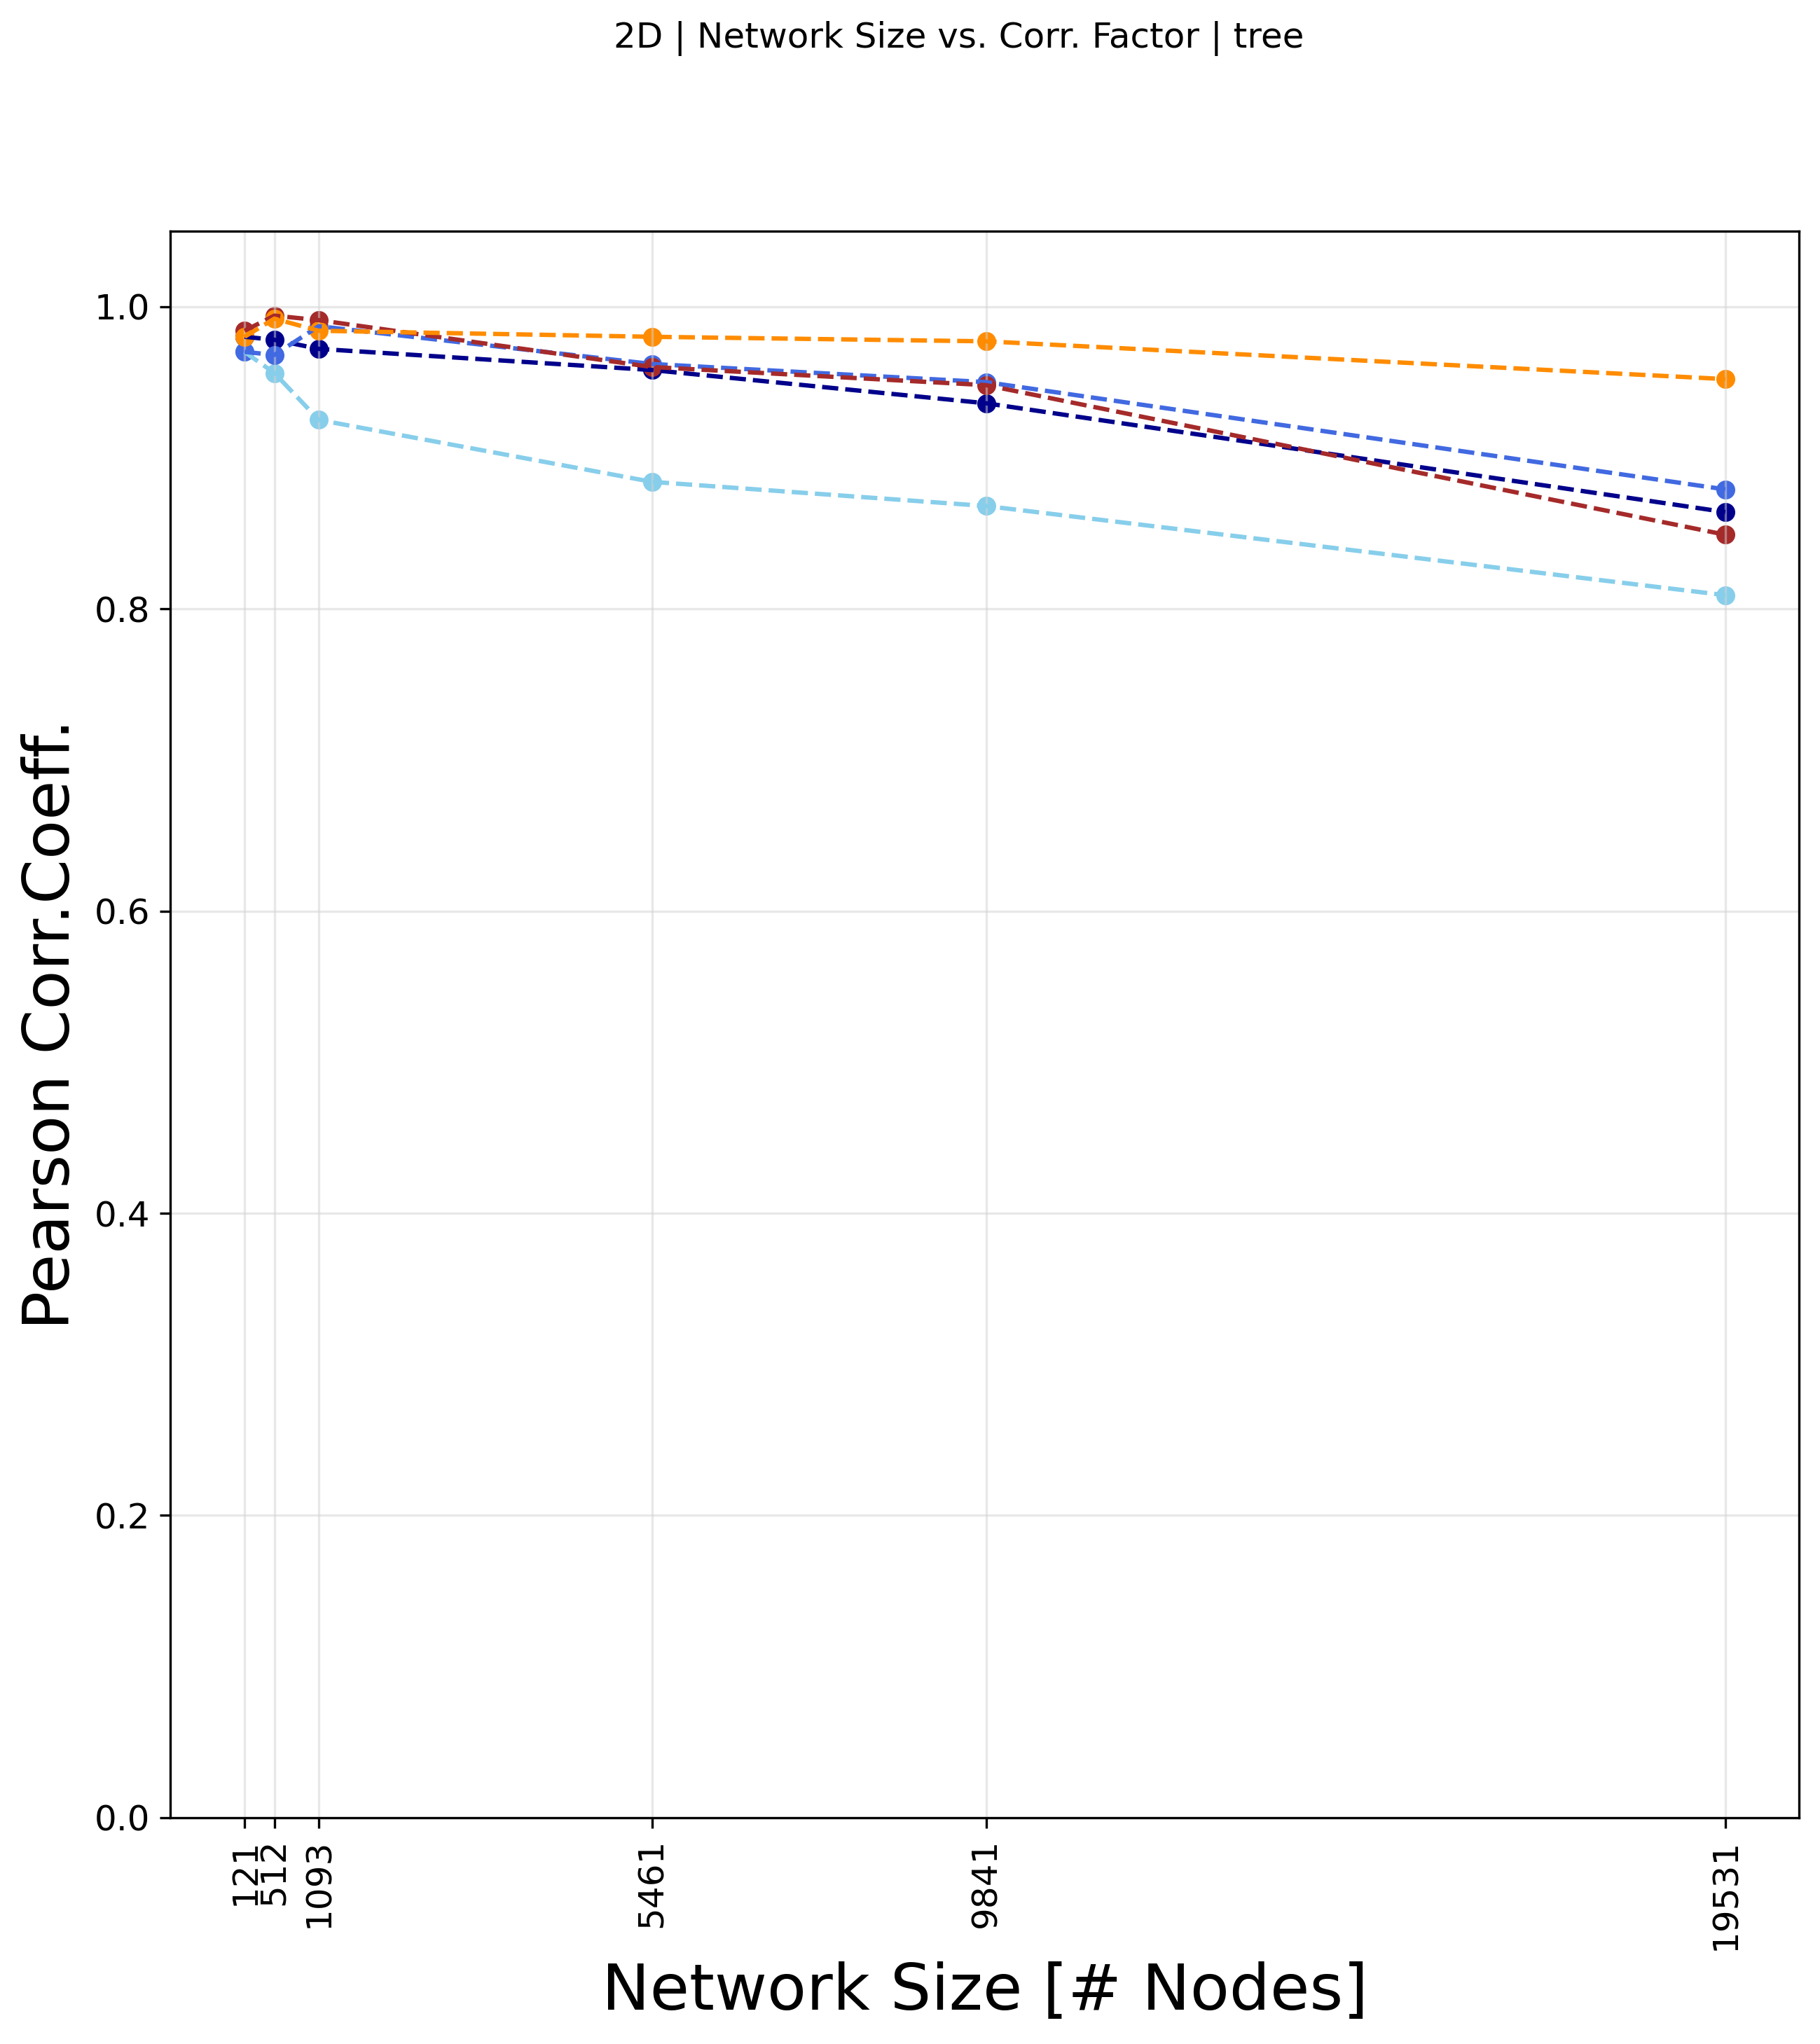

In [54]:
########################################
#
# Network size vs. Correlation Factor 
# with same running time
#
########################################

x_fa = net_sizes 
y_fa = list(d_netsize_corr_fa.values())

x_nx = net_sizes 
y_nx = list(d_netsize_corr_nx.values())

x_ig = net_sizes 
y_ig = list(d_netsize_corr_ig.values())

x_nodevec = net_sizes 
y_nodevec = list(d_netsize_corr_nodevec.values())

x_layout = net_sizes 
y_layout = list(d_netsize_corr_global.values())

fig = plt.figure(figsize=(10,10), dpi=300)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.ylabel("Pearson Corr.Coeff.", fontsize=labelsize)

plt.plot(x_nx,y_nx, '--', c = 'skyblue', alpha = 1.0, linewidth=1.5) #,label='networkx')
plt.scatter(x_nx,y_nx, c = 'skyblue', s = 30, alpha = 1.0)

plt.plot(x_fa,y_fa, '--', c = 'darkblue', alpha = 1.0, linewidth=1.5) #,label='forceatlas2')
plt.scatter(x_fa,y_fa, c = 'darkblue', s = 30, alpha = 1.0)

plt.plot(x_ig,y_ig, '--', c = 'royalblue', alpha = 1.0, linewidth=1.5) #,label='python-igraph')
plt.scatter(x_ig,y_ig, c = 'royalblue', s = 30, alpha = 1.0)

plt.plot(x_nodevec,y_nodevec, '--', c = 'brown', alpha = 1.0, linewidth=1.5) #,label='cartographs')
plt.scatter(x_nodevec,y_nodevec, c = 'brown', s = 30, alpha = 1.0)

plt.plot(x_layout,y_layout, '--', c = 'darkorange', alpha = 1.0, linewidth=1.5) #,label='cartographs')
plt.scatter(x_layout,y_layout, c = 'darkorange', s = 30, alpha = 1.0)

plt.grid(True, c='lightgrey', alpha=0.5)
plt.suptitle('2D | Network Size vs. Corr. Factor | '+organism, fontsize=12)
plt.ylim(ymin=0, ymax=1.05)

plt.xticks(net_sizes,fontsize=tick_size, rotation=90)
plt.yticks(fontsize=tick_size)

fig.savefig('../output_plots/benchmark/upscaledNEW_2D_CorrNetsize_'+organism+'_ig_nx_fa.png')
fig.savefig('../output_plots/benchmark/upscaledNEW_2D_CorrNetsize_'+organism+'_ig_nx_fa.pdf')

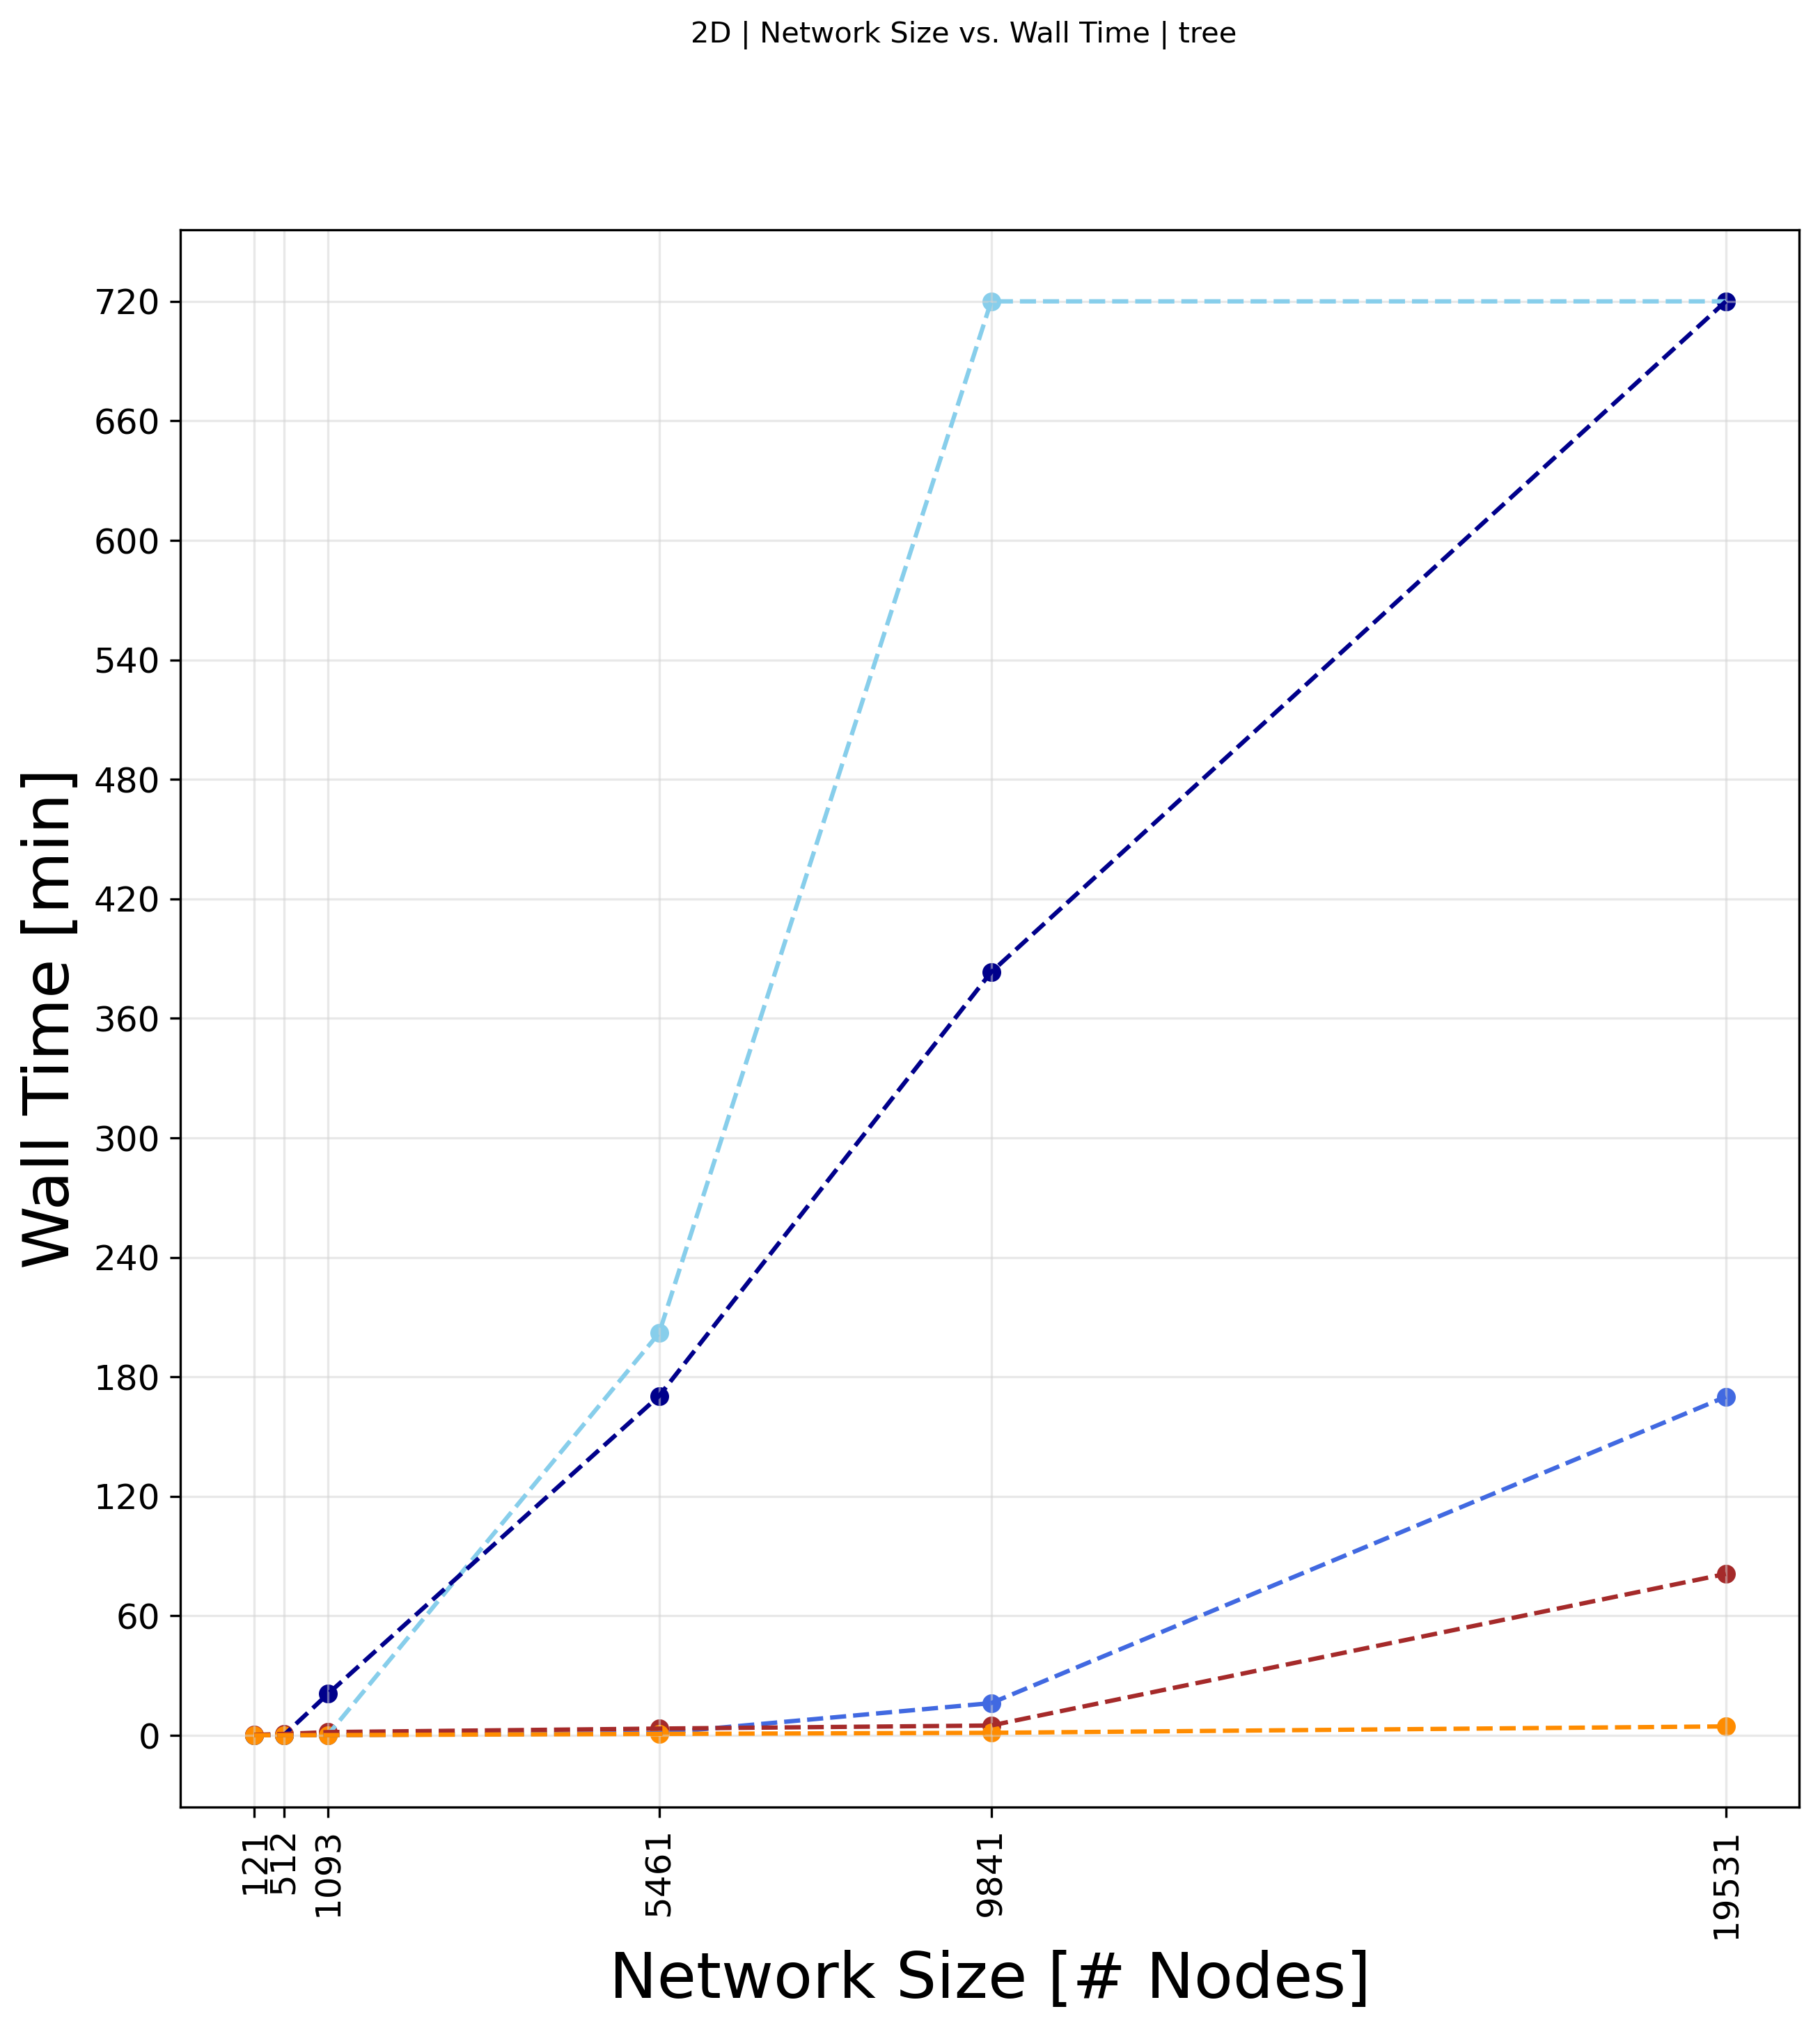

In [57]:
########################################
#
# Network size vs. time
# with same correlation factor
#
########################################

x_fa = net_sizes
y_fa = [(i/60) for i in d_netsize_time_fa.values()]# list(d_netsize_time_spring.values())

x_nx = net_sizes
y_nx = [(i/60) for i in d_netsize_time_nx.values()]# list(d_netsize_time_spring.values())

x_ig = net_sizes
y_ig = [(i/60) for i in d_netsize_time_ig.values()]# list(d_netsize_time_spring.values())

x_nodevec = net_sizes
y_nodevec = [(i/60) for i in d_netsize_time_nodevec.values()]# list(d_netsize_time_spring.values())

x_layout = net_sizes
y_layout = [(i/60) for i in d_netsize_time.values()]# list(d_netsize_time_spring.values())

fig = plt.figure(figsize=(10,10), dpi=300)

plt.xlabel("Network Size [# Nodes]", fontsize=labelsize)
plt.yticks([0,60,120,180,240,300,360,420,480,540,600,660,720])
plt.ylabel("Wall Time [min]", fontsize=labelsize)

plt.plot(x_nx,y_nx, '--', c = 'skyblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_nx,y_nx, c = 'skyblue', s = 30, alpha = 1.0)

plt.plot(x_fa,y_fa, '--', c = 'darkblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_fa,y_fa, c = 'darkblue', s = 30, alpha = 1.0)

plt.plot(x_ig,y_ig, '--', c = 'royalblue', alpha = 1.0, linewidth=1.5)
plt.scatter(x_ig,y_ig, c = 'royalblue', s = 30, alpha = 1.0)

plt.plot(x_nodevec,y_nodevec, '--', c = 'brown', alpha = 1.0, linewidth=1.5) #,label='cartographs')
plt.scatter(x_nodevec,y_nodevec, c = 'brown', s = 30, alpha = 1.0)

plt.plot(x_layout,y_layout, '--', c = 'darkorange', alpha = 1.0, linewidth=1.5)
plt.scatter(x_layout,y_layout, c = 'darkorange', s = 30, alpha = 1.0)

plt.grid(True, c='lightgrey', alpha=0.5)
plt.suptitle('2D | Network Size vs. Wall Time | '+organism, fontsize=10)

plt.xticks(net_sizes,fontsize=tick_size, rotation=90)
plt.yticks(fontsize=tick_size)

fig.savefig('../output_plots/benchmark/upscaledNEW_2D_TimeNetsize_'+organism+'_ig_nx_fa.png')
fig.savefig('../output_plots/benchmark/upscaledNEW_2D_TimeNetsize_'+organism+'_ig_nx_fa.pdf')